## Spotify Data


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#import data
df=pd.read_csv('spotify_churning.csv') 

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,ts,userId,sessionId,page,auth,method,status,level,...,artist,song,length,Datetime,Hour,Day,Month,Year,Date,Time
0,0,0,1538352117,30,29,NextSong,Logged In,PUT,200,paid,...,Martha Tilston,Rockpools,277.89016,2018-10-01 00:01:57,0,1,10,2018,2018-10-01,00:01:57
1,1,1,1538352180,9,8,NextSong,Logged In,PUT,200,free,...,Five Iron Frenzy,Canada,236.09424,2018-10-01 00:03:00,0,1,10,2018,2018-10-01,00:03:00
2,2,2,1538352394,30,29,NextSong,Logged In,PUT,200,paid,...,Adam Lambert,Time For Miracles,282.82730,2018-10-01 00:06:34,0,1,10,2018,2018-10-01,00:06:34
3,3,3,1538352416,9,8,NextSong,Logged In,PUT,200,free,...,Enigma,Knocking On Forbidden Doors,262.71302,2018-10-01 00:06:56,0,1,10,2018,2018-10-01,00:06:56
4,4,4,1538352676,30,29,NextSong,Logged In,PUT,200,paid,...,Daft Punk,Harder Better Faster Stronger,223.60771,2018-10-01 00:11:16,0,1,10,2018,2018-10-01,00:11:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286495,286495,286495,1543622240,300011,500,Home,Logged Out,GET,200,paid,...,Iron Maiden,Murders In The Rue Morgue (1998 Digital Remaster),258.66404,2018-11-30 23:57:20,23,30,11,2018,2018-11-30,23:57:20
286496,286496,286496,1543622241,300011,500,Login,Logged Out,PUT,307,paid,...,Iron Maiden,Murders In The Rue Morgue (1998 Digital Remaster),258.66404,2018-11-30 23:57:21,23,30,11,2018,2018-11-30,23:57:21
286497,286497,286497,1543622248,300011,500,Home,Logged In,GET,200,paid,...,Iron Maiden,Murders In The Rue Morgue (1998 Digital Remaster),258.66404,2018-11-30 23:57:28,23,30,11,2018,2018-11-30,23:57:28
286498,286498,286498,1543622398,300011,500,About,Logged In,GET,200,paid,...,Iron Maiden,Murders In The Rue Morgue (1998 Digital Remaster),258.66404,2018-11-30 23:59:58,23,30,11,2018,2018-11-30,23:59:58


In [ ]:
#checking for nulls
df.isnull().sum()

Unnamed: 0       0
Unnamed: 0.1     0
ts               0
userId           0
sessionId        0
page             0
auth             0
method           0
status           0
level            0
itemInSession    0
location         0
userAgent        0
lastName         0
firstName        0
registration     0
gender           0
artist           0
song             0
length           0
Datetime         0
Hour             0
Day              0
Month            0
Year             0
Date             0
Time             0
dtype: int64

In [ ]:
#column list
df.columns.tolist()

['Unnamed: 0',
 'Unnamed: 0.1',
 'ts',
 'userId',
 'sessionId',
 'page',
 'auth',
 'method',
 'status',
 'level',
 'itemInSession',
 'location',
 'userAgent',
 'lastName',
 'firstName',
 'registration',
 'gender',
 'artist',
 'song',
 'length',
 'Datetime',
 'Hour',
 'Day',
 'Month',
 'Year',
 'Date',
 'Time']

In [ ]:
#dropping duplicate values
df.drop_duplicates(subset=["page","level","status","userId"])

,Unnamed: 0,Unnamed: 0.1,ts,userId,sessionId,page,auth,method,status,level,...,artist,song,length,Datetime,Hour,Day,Month,Year,Date,Time
0,0,0,1538352117,30,29,NextSong,Logged In,PUT,200,paid,...,Martha Tilston,Rockpools,277.89016,2018-10-01 00:01:57,0,1,10,2018,2018-10-01,00:01:57
1,1,1,1538352180,9,8,NextSong,Logged In,PUT,200,free,...,Five Iron Frenzy,Canada,236.09424,2018-10-01 00:03:00,0,1,10,2018,2018-10-01,00:03:00
8,8,8,1538352905,30,29,Add to Playlist,Logged In,PUT,200,paid,...,Starflyer 59,Passengers (Old Album Version),185.44281,2018-10-01 00:15:05,0,1,10,2018,2018-10-01,00:15:05
11,11,11,1538353150,9,8,Roll Advert,Logged In,GET,200,free,...,Britt Nicole,Walk On The Water,229.87710,2018-10-01 00:19:10,0,1,10,2018,2018-10-01,00:19:10
14,14,14,1538353376,9,8,Thumbs Up,Logged In,PUT,307,free,...,Tesla,Gettin' Better,201.06404,2018-10-01 00:22:56,0,1,10,2018,2018-10-01,00:22:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285299,285299,285299,1543488829,300023,479,Thumbs Up,Logged In,PUT,307,free,...,The Cardigans,Erase / Rewind,218.33098,2018-11-29 10:53:49,10,29,11,2018,2018-11-29,10:53:49
285308,285308,285308,1543489353,300023,479,Add to Playlist,Logged In,PUT,200,free,...,Yonder Mountain String Band,Things You're Selling,263.10485,2018-11-29 11:02:33,11,29,11,2018,2018-11-29,11:02:33
285344,285344,285344,1543494316,300023,479,Logout,Logged In,PUT,307,free,...,Austin Collins,Things You Want The Most,179.93098,2018-11-29 12:25:16,12,29,11,2018,2018-11-29,12:25:16
285356,285356,285356,1543495183,300023,479,Upgrade,Logged In,GET,200,free,...,Boikot,No pasarÃÂ¡n,245.13261,2018-11-29 12:39:43,12,29,11,2018,2018-11-29,12:39:43


In [ ]:
#dropping unnecessary columns
df.drop(['Unnamed: 0','Unnamed: 0.1','ts','registration','Datetime','Time','Date'],axis=1,inplace=True)

In [ ]:
#extracting last two characters from location(eg.CA-California)
df['location'] = df['location'].str[-2:]

In [ ]:
df.head()

,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,lastName,firstName,gender,artist,song,length,Hour,Day,Month,Year
0,30,29,NextSong,Logged In,PUT,200,paid,50,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,M,Martha Tilston,Rockpools,277.89016,0,1,10,2018
1,9,8,NextSong,Logged In,PUT,200,free,79,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,M,Five Iron Frenzy,Canada,236.09424,0,1,10,2018
2,30,29,NextSong,Logged In,PUT,200,paid,51,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,M,Adam Lambert,Time For Miracles,282.82730,0,1,10,2018
3,9,8,NextSong,Logged In,PUT,200,free,80,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,M,Enigma,Knocking On Forbidden Doors,262.71302,0,1,10,2018
4,30,29,NextSong,Logged In,PUT,200,paid,52,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,M,Daft Punk,Harder Better Faster Stronger,223.60771,0,1,10,2018


## Defining churn

For predicting churn, first we need to create a churn column using values in page columns. if page= 'Cancellation Confirmation', 'downgrade' and 'submit downgrade' than customers has churned(1) -which means they have either canceld subsciption or moved to free service, if not this case the customer has not churned(0).

In [ ]:
def churning(i):
    if (i['page'] == 'Cancellation Confirmation') or (i['page'] == 'Downgrade') or (i['page'] > 'Submit Downgrade'):
        return 1
    else:
        return 0
    
df['churn'] = df.apply(churning, axis=1)

In [ ]:
df.head()

,userId,sessionId,page,auth,method,status,level,itemInSession,location,userAgent,...,firstName,gender,artist,song,length,Hour,Day,Month,Year,churn
0,30,29,NextSong,Logged In,PUT,200,paid,50,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,...,Colin,M,Martha Tilston,Rockpools,277.89016,0,1,10,2018,0
1,9,8,NextSong,Logged In,PUT,200,free,79,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",...,Micah,M,Five Iron Frenzy,Canada,236.09424,0,1,10,2018,0
2,30,29,NextSong,Logged In,PUT,200,paid,51,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,...,Colin,M,Adam Lambert,Time For Miracles,282.82730,0,1,10,2018,0
3,9,8,NextSong,Logged In,PUT,200,free,80,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",...,Micah,M,Enigma,Knocking On Forbidden Doors,262.71302,0,1,10,2018,0
4,30,29,NextSong,Logged In,PUT,200,paid,52,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,...,Colin,M,Daft Punk,Harder Better Faster Stronger,223.60771,0,1,10,2018,0


In [ ]:
#all the unique values from each column
df.nunique()

userId             225
sessionId         2354
page                22
auth                 4
method               2
status               3
level                2
itemInSession     1322
location            39
userAgent           56
lastName           173
firstName          189
gender               2
artist           17655
song             58478
length           14865
Hour                24
Day                 31
Month                3
Year                 1
churn                2
dtype: int64

In [ ]:
#id columns
Id_cols     = ['userId','sessionId']

#Target variable
target_col = ["Churn"]

#categorical variables
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

#numerical variables
num_cols   = ['itemInSession','length']

#categorical Binary variables 
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()

#Columns that have more than 2 values, and not in categorical and binary columns list
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Time columns
time_cols=['Hour','Day']

In [ ]:
cat_cols

['auth', 'method', 'status', 'level', 'gender', 'Month', 'Year', 'churn']

In [ ]:
bin_cols

['method', 'level', 'gender', 'churn']

In [ ]:
multi_cols

['auth', 'status', 'Month', 'Year']

In [ ]:
#Label encoding Binary columns with 0 and 1
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
for i in bin_cols :
    df[i] = en.fit_transform(df[i])
    
#Making variable columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols)

In [ ]:
df

,userId,sessionId,page,method,level,itemInSession,location,userAgent,lastName,firstName,...,auth_Guest,auth_Logged In,auth_Logged Out,status_200,status_307,status_404,Month_10,Month_11,Month_12,Year_2018
0,30,29,NextSong,1,1,50,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,...,0,1,0,1,0,0,1,0,0,1
1,9,8,NextSong,1,0,79,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,...,0,1,0,1,0,0,1,0,0,1
2,30,29,NextSong,1,1,51,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,...,0,1,0,1,0,0,1,0,0,1
3,9,8,NextSong,1,0,80,NH,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",Long,Micah,...,0,1,0,1,0,0,1,0,0,1
4,30,29,NextSong,1,1,52,CA,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,Freeman,Colin,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286495,300011,500,Home,0,1,41,PA,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,...,0,0,1,1,0,0,0,1,0,1
286496,300011,500,Login,1,1,42,PA,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,...,0,0,1,0,1,0,0,1,0,1
286497,300011,500,Home,0,1,43,PA,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,...,0,1,0,1,0,0,0,1,0,1
286498,300011,500,About,0,1,44,PA,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,House,Emilia,...,0,1,0,1,0,0,0,1,0,1


In [ ]:
#Scaling Numeric columns
from sklearn.preprocessing import StandardScaler
ss_scaler = StandardScaler()
ss = ss_scaler.fit_transform(df[num_cols])
ss = pd.DataFrame(ss,columns=num_cols)

In [ ]:
ss

,itemInSession,length
0,-0.496383,0.284522
1,-0.272906,-0.133385
2,-0.488677,0.333887
3,-0.265200,0.132770
4,-0.480971,-0.258234
...,...,...
286495,-0.565739,0.092285
286496,-0.558032,0.092285
286497,-0.550326,0.092285
286498,-0.542620,0.092285


In [ ]:
#merging scaled data to the original data
df = df.drop(columns = num_cols,axis = 1)
df = df.merge(ss,left_index=True,right_index=True,how = "left")

In [ ]:
#summary
df.describe()

,userId,sessionId,method,level,gender,Hour,Day,churn,auth_Cancelled,auth_Guest,...,auth_Logged Out,status_200,status_307,status_404,Month_10,Month_11,Month_12,Year_2018,itemInSession,length
count,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,...,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.000000,286500.0,2.865000e+05,2.865000e+05
mean,59602.460373,1041.526555,0.911218,0.796377,0.444485,12.204834,15.788499,0.062363,0.000182,0.000339,...,0.028792,0.906848,0.092251,0.000901,0.521585,0.478401,0.000014,1.0,-6.818399e-15,-4.855123e-16
std,108941.766997,726.776263,0.284429,0.402693,0.496909,6.864561,8.926683,0.241814,0.013471,0.018397,...,0.167223,0.290646,0.289381,0.029995,0.499535,0.499534,0.003737,0.0,1.000002e+00,1.000002e+00
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-8.816893e-01,-2.486199e+00
25%,51.000000,336.000000,1.000000,1.000000,0.000000,6.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-6.736242e-01,-4.948739e-01
50%,98.000000,1013.000000,1.000000,1.000000,0.000000,13.000000,16.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,-3.422611e-01,-1.490562e-01
75%,100004.000000,1675.000000,1.000000,1.000000,1.000000,18.000000,23.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,3.223915e-01,2.772085e-01
max,300025.000000,2474.000000,1.000000,1.000000,1.000000,23.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,9.298092e+00,2.774882e+01


In [ ]:
#checking for nulls
df.isnull().sum()

userId             0
sessionId          0
page               0
method             0
level              0
location           0
userAgent          0
lastName           0
firstName          0
gender             0
artist             0
song               0
Hour               0
Day                0
churn              0
auth_Cancelled     0
auth_Guest         0
auth_Logged In     0
auth_Logged Out    0
status_200         0
status_307         0
status_404         0
Month_10           0
Month_11           0
Month_12           0
Year_2018          0
itemInSession      0
length             0
dtype: int64

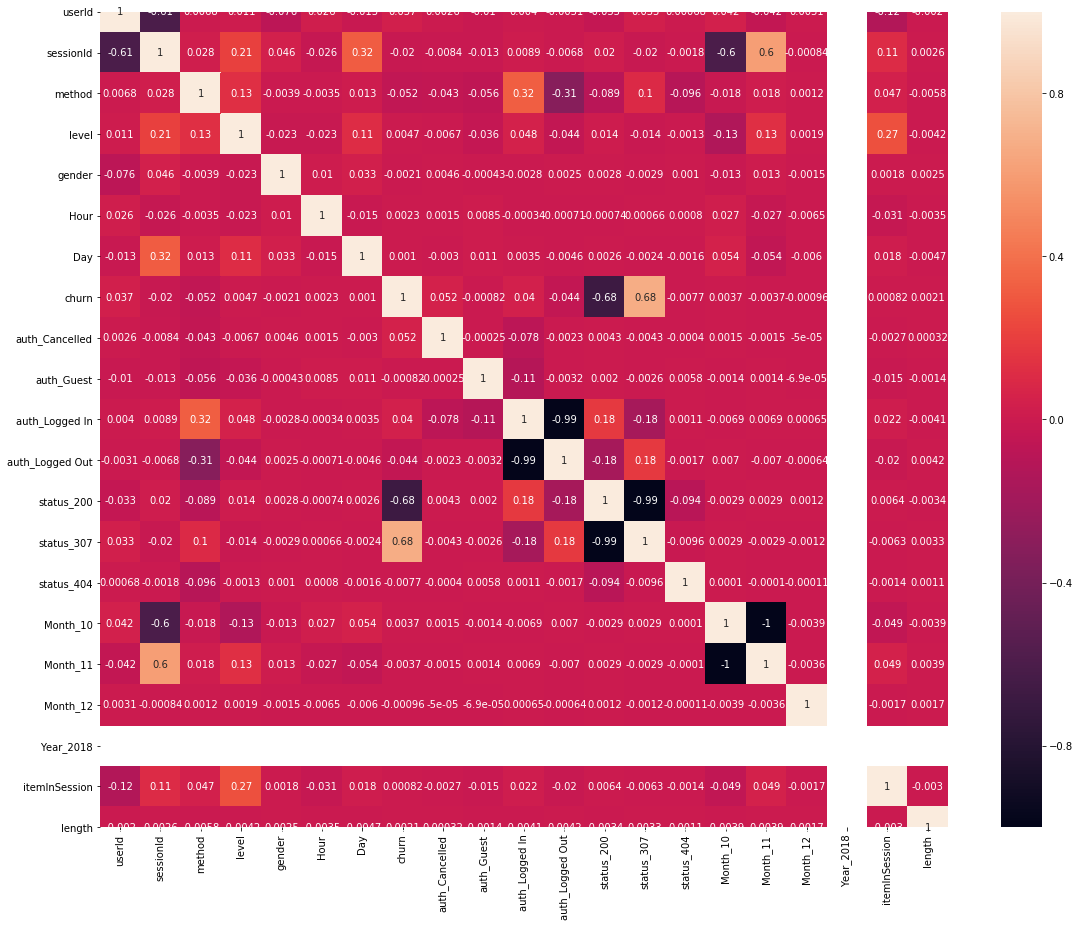

In [ ]:
#correlation matrix heatmap
plt.figure(figsize=(19, 15))
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

In [ ]:
#dropping target variable and unnecessary columns and for model building
#separating features and target variable
X = df.drop(['churn','page','location','userAgent','lastName','firstName','artist','song'], axis=1)

In [ ]:
#shape (rows/columns)
X.shape

(286500, 20)

In [ ]:
#seperating target variable
y = df['churn']

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
#splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

## Logistic regression

In [ ]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     53716
           1       0.53      0.29      0.37      3584

    accuracy                           0.94     57300
   macro avg       0.74      0.63      0.67     57300
weighted avg       0.93      0.94      0.93     57300



## Decision tree classifier

In [ ]:
tree = DecisionTreeClassifier(random_state = 2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [ ]:
y_pred_tree = tree.predict(X_test)

In [ ]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     53716
           1       0.53      0.29      0.37      3584

    accuracy                           0.94     57300
   macro avg       0.74      0.63      0.67     57300
weighted avg       0.93      0.94      0.93     57300



## Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.7256949152542372

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     53716
           1       0.71      0.75      0.73      3584

    accuracy                           0.96     57300
   macro avg       0.84      0.86      0.85     57300
weighted avg       0.97      0.96      0.97     57300



## linear svc

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     53716
           1       0.11      0.45      0.17      3584

    accuracy                           0.73     57300
   macro avg       0.53      0.60      0.50     57300
weighted avg       0.90      0.73      0.80     57300



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     53716
           1       0.00      0.00      0.00      3584

    accuracy                           0.94     57300
   macro avg       0.47      0.50      0.48     57300
weighted avg       0.88      0.94      0.91     57300



Random forest classifier has the best accuracy wich is 96%.